In [1]:
install.packages('randomForest')
install.packages('caTools')

Installing package into ‘/home/manhcuong/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)

Installing package into ‘/home/manhcuong/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)



In [2]:
library(randomForest)
library(caTools)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.



In [3]:
library(rpart)

In [4]:
summary(iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

In [5]:
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


# 1. Tạo training và test data

In [6]:
set.seed(42)

trainingRowIndex = sample(1:nrow(iris), 0.7*nrow(iris))
trainingData = iris[trainingRowIndex,]
testData = iris[-trainingRowIndex,]

# 2. Build model
## 2.1. Classification

In [7]:
rf_model = randomForest(x = trainingData[-5], y = trainingData$Species, ntree = 500)

In [8]:
rf_model


Call:
 randomForest(x = trainingData[-5], y = trainingData$Species,      ntree = 500) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 6.67%
Confusion matrix:
           setosa versicolor virginica class.error
setosa         38          0         0  0.00000000
versicolor      0         33         2  0.05714286
virginica       0          5        27  0.15625000

In [9]:
rf_model_1 = randomForest(Species ~ Sepal.Length + Sepal.Width + Sepal.Length + Petal.Width,
                          data = trainingData, ntree = 500)

In [10]:
rf_model_1


Call:
 randomForest(formula = Species ~ Sepal.Length + Sepal.Width +      Sepal.Length + Petal.Width, data = trainingData, ntree = 500) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 1

        OOB estimate of  error rate: 4.76%
Confusion matrix:
           setosa versicolor virginica class.error
setosa         38          0         0  0.00000000
versicolor      0         34         1  0.02857143
virginica       0          4        28  0.12500000

### 2.1.1. Trực quan hóa

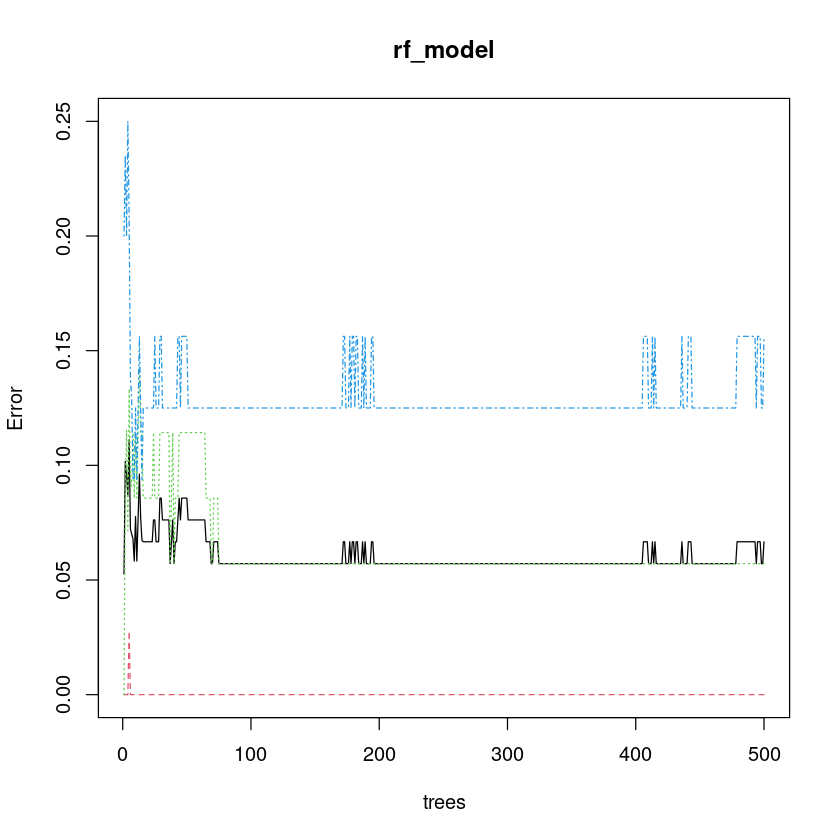

In [15]:
plot(rf_model)

* Thuộc tính quan trọng

In [16]:
importance(rf_model)

,MeanDecreaseGini
Sepal.Length,7.165020
Sepal.Width,1.909771
Petal.Length,30.523330
Petal.Width,29.528098


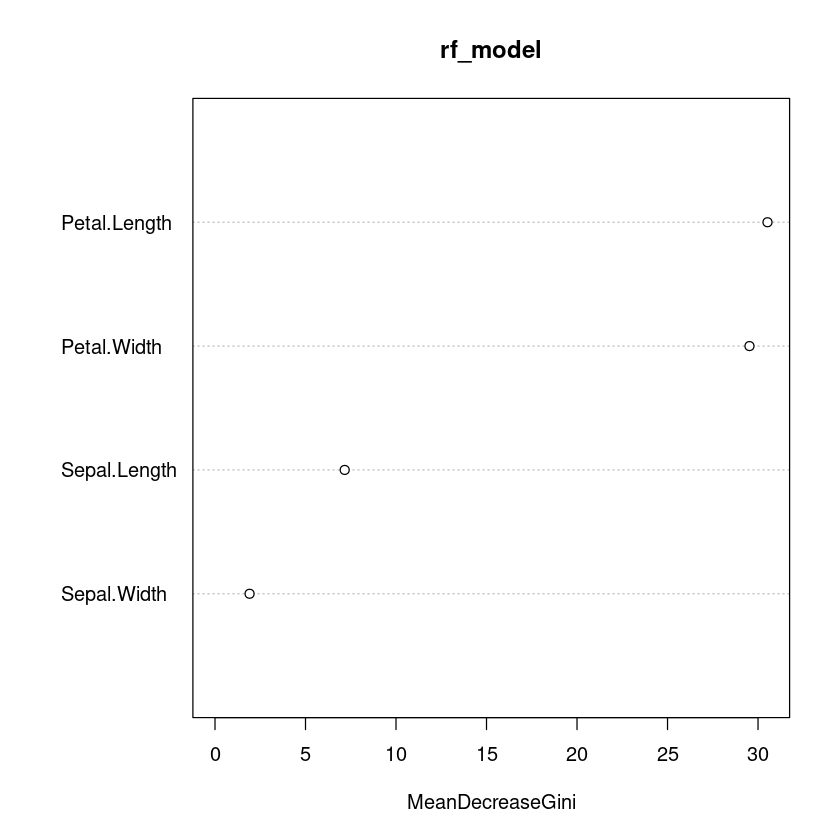

In [17]:
varImpPlot(rf_model)

### 2.1.2. Dự đoán kết quả của test data và evaluation

In [12]:
y_test_pred = predict(rf_model, newdata = testData[-5])

y_test_pred

7         11         12         19         23         25         28 
    setosa     setosa     setosa     setosa     setosa     setosa     setosa 
        31         37         39         45         46         51         52 
    setosa     setosa     setosa     setosa     setosa versicolor versicolor 
        56         59         62         63         66         67         70 
versicolor versicolor versicolor versicolor versicolor versicolor versicolor 
        75         78         79         82         91         95        101 
versicolor  virginica versicolor versicolor versicolor versicolor  virginica 
       102        106        108        112        113        116        117 
 virginica  virginica  virginica  virginica  virginica  virginica  virginica 
       119        125        127        133        134        137        141 
 virginica  virginica  virginica  virginica versicolor  virginica  virginica 
       143        147        148 
 virginica  virginica  virginica 
Levels: setosa versicolor virginica

In [13]:
accuracy = table(y_test_pred, testData$Species)
accuracy

            
y_test_pred  setosa versicolor virginica
  setosa         12          0         0
  versicolor      0         14         1
  virginica       0          1        17

In [14]:
accuracy = sum(diag(accuracy))/sum(accuracy)

accuracy

[1] 0.9555556

In [12]:
new_cases = iris[c(1, 10, 100, 140),]
new_cases$Species = NULL

new_cases

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
,<dbl>,<dbl>,<dbl>,<dbl>
1,5.1,3.5,1.4,0.2
10,4.9,3.1,1.5,0.1
100,5.7,2.8,4.1,1.3
140,6.9,3.1,5.4,2.1


In [13]:
pred_new = predict(iris.tree, new_cases, type = 'class')

pred_new

1         10        100        140 
    setosa     setosa versicolor  virginica 
Levels: setosa versicolor virginica

## 2.2. Regression

In [19]:
rf.gre = randomForest(Petal.Length ~ Petal.Width, data = trainingData, ntree = 300)

rf.gre


Call:
 randomForest(formula = Petal.Length ~ Petal.Width, data = trainingData,      ntree = 300) 
               Type of random forest: regression
                     Number of trees: 300
No. of variables tried at each split: 1

          Mean of squared residuals: 0.1762133
                    % Var explained: 94.39

### 2.2.1. Trực quan hóa

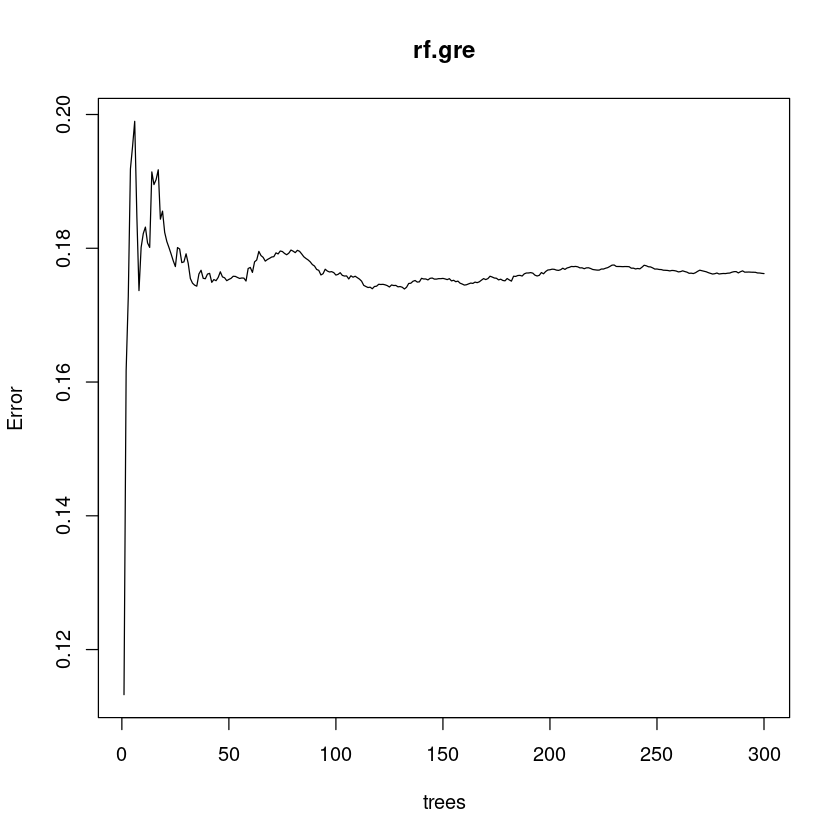

In [20]:
plot(rf.gre)

### 2.2.2. Dự đoán kết quả cho test data

In [21]:
newdf = data.frame(testData['Petal.Width'])

In [22]:
predictions = predict(rf.gre, newdf)

In [23]:
head(predictions)

7       11       12       19       23       25 
1.378817 1.439247 1.439247 1.378817 1.439247 1.439247

### 2.2.3. Evaluation

In [24]:
# Evaluation
mse = mean((testData$Petal.Length - predictions)^2)
mse

[1] 0.1978511

### 2.2.4. Dự đoán kết quả mới

In [25]:
now = data.frame(Petal.Width = c(.25, 1.15, 2.25))
predict_new = predict(rf.gre, now)

predict_new

1        2        3 
1.439247 3.534439 6.100688